### Provide by

นายธนชาติ เสถียรจารุการ 63340500021 <br>

นายพชพล เพชรรัตน์ 63340500036

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import QuantileTransformer

df = pd.read_csv('bank-additional-full.csv', sep=';')
df = df.drop(['duration'], axis=1)
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

### Data exploration


##### Check null of dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

##### Target
The total number of data is 41188 samples devided into
- No: 36548 samples
<br>

- Yes: 4640 samples

**this means that the dataset is imbalanced**



no     36548
yes     4640
Name: y, dtype: int64


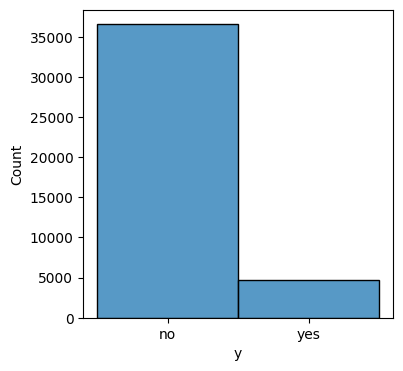

In [3]:
print(df['y'].value_counts())
plt.figure(figsize = (4,4))
sns.histplot(data = df, x = 'y')
plt.show()

##### Explore numerical data

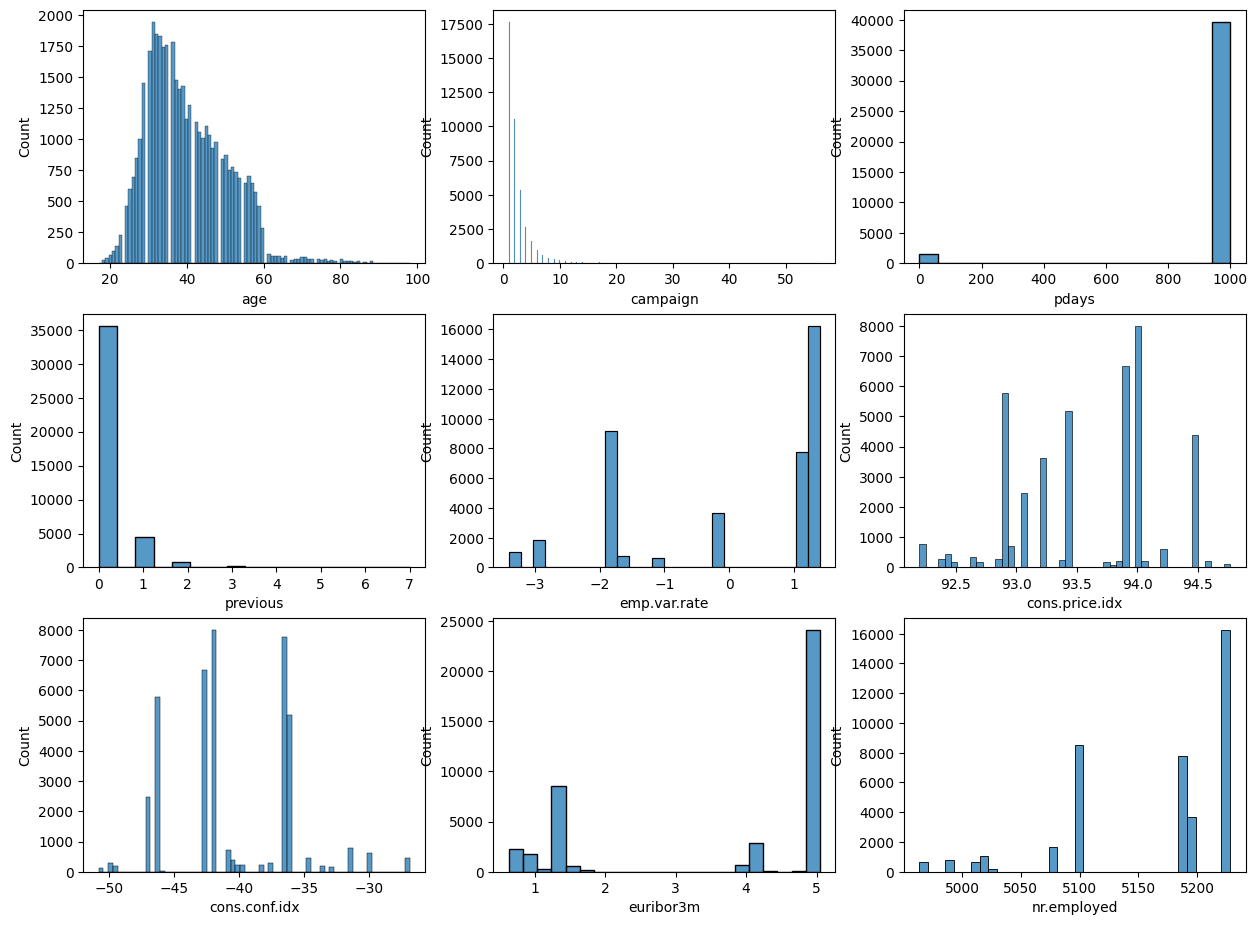

In [4]:
cols = df.columns
num_data = list(df._get_numeric_data().columns)
cat_data = list(set(cols) - set(num_data))

plot_num = 1
plt.figure(figsize = (15,27))
for i in num_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.histplot(data=df, x=i)
    plot_num += 1
plt.show()


- age
    - ages over 60 seem to be the outlier

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
no     496
yes    414
Name: y, dtype: int64


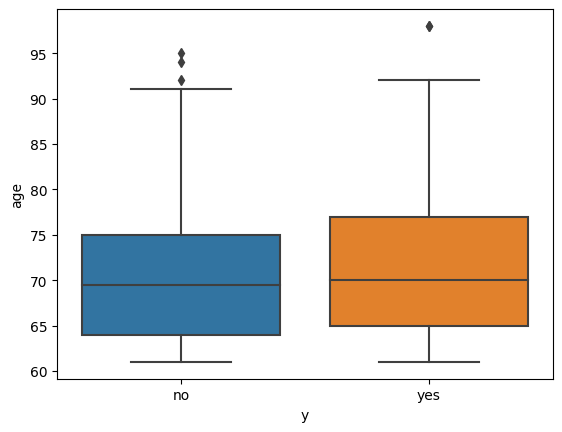

In [5]:
print(df['age'].value_counts())
cut_sample = df.loc[df['age'] > 60]
print(cut_sample['y'].value_counts())
sns.boxplot(data = cut_sample, x = 'y', y = 'age')
plt.show()

- campaign
    - number of campaign over 20 seem to be the outlier

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64
no     156
yes      1
Name: y, dtype: int64


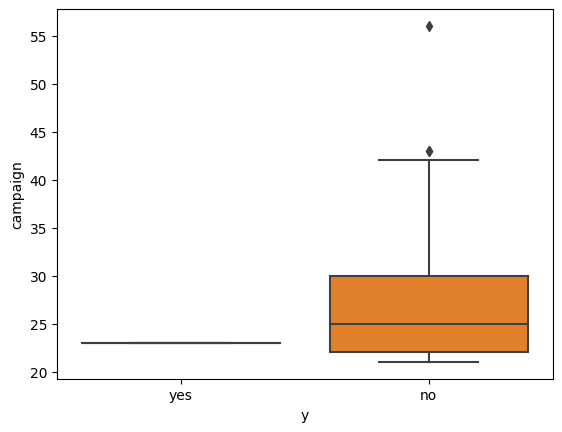

In [6]:
print(df['campaign'].value_counts())
cut_sample = df.loc[df['campaign'] >= 21]
print(cut_sample['y'].value_counts())
sns.boxplot(data = cut_sample, x = 'y', y = 'campaign')
plt.show()


- pdays
    - replace value 999 to -1
    - and pdays value over 15 seem to be the outlier
    - group data to 2 categorical

In [7]:
df['pdays'] = df['pdays'].replace([999], [-1])
print(df['pdays'].value_counts())

cut_sample = df.loc[df['pdays'] > 15]
print(cut_sample['y'].value_counts())
sns.boxplot(data = cut_sample, x = 'y', y = 'pdays')
plt.show()

-1     39673
 3       439
 6       412
 4       118
 9        64
 2        61
 7        60
 12       58
 10       52
 5        46
 13       36
 11       28
 1        26
 15       24
 14       20
 8        18
 0        15
 16       11
 17        8
 18        7
 22        3
 19        3
 21        2
 25        1
 26        1
 27        1
 20        1
Name: pdays, dtype: int64
yes    20
no     18
Name: y, dtype: int64


- previous
    - previous values over 3 seem to be the outlier but most of the sample that has previous values over 3 have target 'yes' i guess it is positive to our model so I decided to keep it
    - group data to 2 categorical

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64
yes    54
no     40
Name: y, dtype: int64


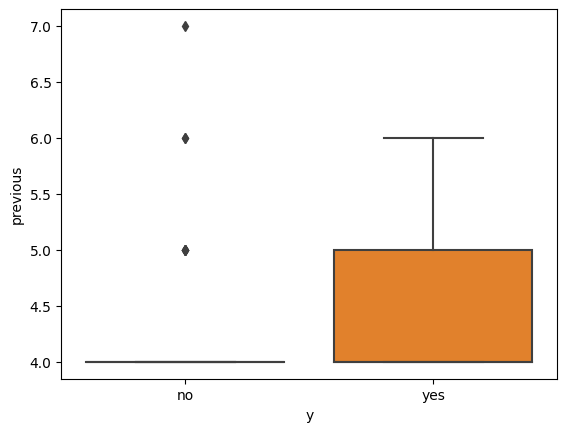

In [8]:
print(df['previous'].value_counts())

cut_sample = df.loc[df['previous'] > 3]
print(cut_sample['y'].value_counts())
sns.boxplot(data = cut_sample, x = 'y', y = 'previous')
plt.show()

- emp.var.rate

In [9]:
df['emp.var.rate'].value_counts()
unique = df['emp.var.rate'].unique()
print(sorted(unique))

[-3.4, -3.0, -2.9, -1.8, -1.7, -1.1, -0.2, -0.1, 1.1, 1.4]


- cons.price.idx

In [10]:
df['cons.price.idx'].value_counts()
unique = df['cons.price.idx'].unique()
print(sorted(unique))

[92.201, 92.379, 92.431, 92.469, 92.649, 92.713, 92.756, 92.843, 92.893, 92.963, 93.075, 93.2, 93.369, 93.444, 93.749, 93.798, 93.876, 93.918, 93.994, 94.027, 94.055, 94.199, 94.215, 94.465, 94.601, 94.767]


- cons.conf.idx

In [11]:
df['cons.conf.idx'].value_counts()
unique = df['cons.conf.idx'].unique()
print(sorted(unique))

[-50.8, -50.0, -49.5, -47.1, -46.2, -45.9, -42.7, -42.0, -41.8, -40.8, -40.4, -40.3, -40.0, -39.8, -38.3, -37.5, -36.4, -36.1, -34.8, -34.6, -33.6, -33.0, -31.4, -30.1, -29.8, -26.9]


- euribor3m

In [12]:
df['euribor3m'].value_counts()
unique = df['euribor3m'].unique()
print(sorted(unique))

[0.634, 0.635, 0.636, 0.637, 0.638, 0.639, 0.64, 0.642, 0.643, 0.644, 0.645, 0.646, 0.649, 0.65, 0.651, 0.652, 0.653, 0.654, 0.655, 0.659, 0.663, 0.668, 0.672, 0.677, 0.682, 0.683, 0.684, 0.685, 0.688, 0.69, 0.692, 0.695, 0.697, 0.699, 0.7, 0.701, 0.702, 0.704, 0.706, 0.707, 0.708, 0.709, 0.71, 0.711, 0.712, 0.713, 0.714, 0.715, 0.716, 0.717, 0.718, 0.719, 0.72, 0.721, 0.722, 0.723, 0.724, 0.727, 0.728, 0.729, 0.73, 0.731, 0.732, 0.733, 0.735, 0.737, 0.739, 0.74, 0.741, 0.742, 0.743, 0.744, 0.748, 0.749, 0.75, 0.752, 0.753, 0.754, 0.755, 0.761, 0.762, 0.766, 0.767, 0.768, 0.77, 0.771, 0.773, 0.778, 0.781, 0.782, 0.788, 0.79, 0.793, 0.797, 0.802, 0.803, 0.809, 0.81, 0.813, 0.819, 0.821, 0.822, 0.825, 0.827, 0.829, 0.834, 0.835, 0.838, 0.84, 0.843, 0.846, 0.849, 0.851, 0.854, 0.859, 0.861, 0.869, 0.87, 0.873, 0.876, 0.877, 0.878, 0.879, 0.88, 0.881, 0.882, 0.883, 0.884, 0.885, 0.886, 0.888, 0.889, 0.89, 0.891, 0.893, 0.894, 0.895, 0.896, 0.898, 0.899, 0.9, 0.903, 0.904, 0.905, 0.908, 0.9

- nr.employed

In [13]:
df['nr.employed'].value_counts()
unique = df['nr.employed'].unique()
print(sorted(unique))

[4963.6, 4991.6, 5008.7, 5017.5, 5023.5, 5076.2, 5099.1, 5176.3, 5191.0, 5195.8, 5228.1]


##### Summarize numeric outlier
- age values over 60
- campaign values over 20
- pdays values over 15

##### Explore categorical data


In [14]:
plot_num = 1
plt.figure(figsize = (15,27))
for i in cat_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.histplot(data=df, x=i)
    plot_num += 1
plt.show()

- day_of_week

In [15]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

- job
    - consider to cut unknown job

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
no     293
yes     37
Name: y, dtype: int64


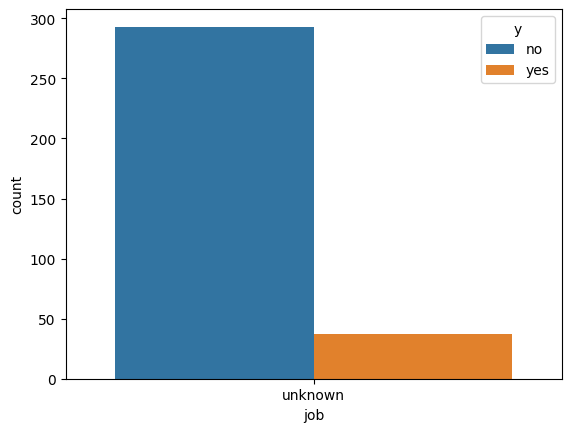

In [16]:
print(df['job'].value_counts())
cut_sample = df.loc[df['job'] == 'unknown']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'job', hue = 'y')
plt.show()

- poutcome

In [17]:
df['poutcome'].value_counts()


nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

- marital
    - consider to cut unknown marital status

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
no     68
yes    12
Name: y, dtype: int64


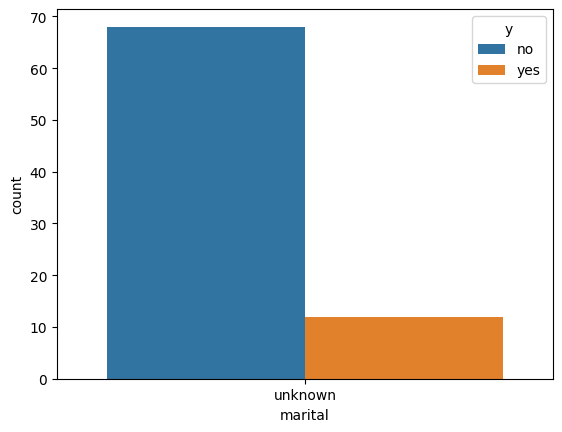

In [18]:
print(df['marital'].value_counts())
cut_sample = df.loc[df['marital'] == 'unknown']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'marital', hue = 'y')
plt.show()


- housing
    - consider to cut unknown housing data
    - change to numerical data

In [19]:
print(df['housing'].value_counts())
cut_sample = df.loc[df['housing'] == 'unknown']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'housing', hue = 'y')
plt.show()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
no     883
yes    107
Name: y, dtype: int64


- month
    - consider to change months categorical to numerical

In [20]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

- loan
    - consider to cut unknown loan data
    - change to numerical data

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
no     883
yes    107
Name: y, dtype: int64


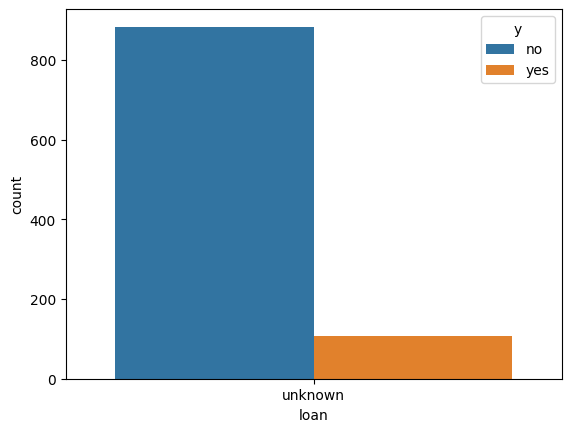

In [21]:
print(df['loan'].value_counts())
cut_sample = df.loc[df['loan'] == 'unknown']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'loan', hue = 'y')
plt.show()

- default
    - consider to cut yes data then change to numerical data

In [22]:
print(df['default'].value_counts())
cut_sample = df.loc[df['default'] == 'yes']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'default', hue = 'y')
plt.show()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
no    3
Name: y, dtype: int64


- education
    - consider to cut illiterate education level

In [23]:
print(df['education'].value_counts())
cut_sample = df.loc[df['education'] == 'illiterate']
print(cut_sample['y'].value_counts())
sns.countplot(data = cut_sample, x = 'education', hue = 'y')
plt.show()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
no     14
yes     4
Name: y, dtype: int64


- contact
    - change to numerical data

In [24]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

##### Summarize categorical outlier
- cut unknown from job data
- cut unknown from marital data
- cut unknown from housing data
- cut unknown from loan data
- cut yes from default data
- cut illiterate from education data
- change month categorical to numerical
- change default data to numerical
- change loan data to numerical
- change contact data to numerical
- change housing data to numerical
- change target data to numerical
- group previos data
- group pdays data

##### Remove outlier

In [25]:
df = df.loc[df['age'] <= 60]
df = df.loc[df['campaign'] <= 20]
df = df.loc[df['pdays'] <= 15]
df = df.loc[df['job'] != 'unknown']
df = df.loc[df['marital'] != 'unknown']
df = df.loc[df['housing'] != 'unknown']
df = df.loc[df['loan'] != 'unknown']
df = df.loc[df['default'] != 'yes']
df = df.loc[df['education'] != 'illiterate']
df['month'] = df['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], list(range(1,13,1)))
df['default'] = df['default'].replace(['no', 'unknown'], [0,1])
df['loan'] = df['loan'].replace(['no', 'yes'], [0,1])
df['housing'] = df['housing'].replace(['no', 'yes'], [0,1])
df['contact'] = df['contact'].replace(['telephone', 'cellular'], [0,1])

df['y'] = df['y'].replace(['no', 'yes'], [0, 1])

##### group data
df['pdays'] = df['pdays'].replace(list(range(16)), ([1]*16))
df['pdays'] = df['pdays'].replace([-1], (0))
df['previous'] = df['previous'].replace(list(range(1,16,1)), ([1]*15))

##### Distribution of numerical data

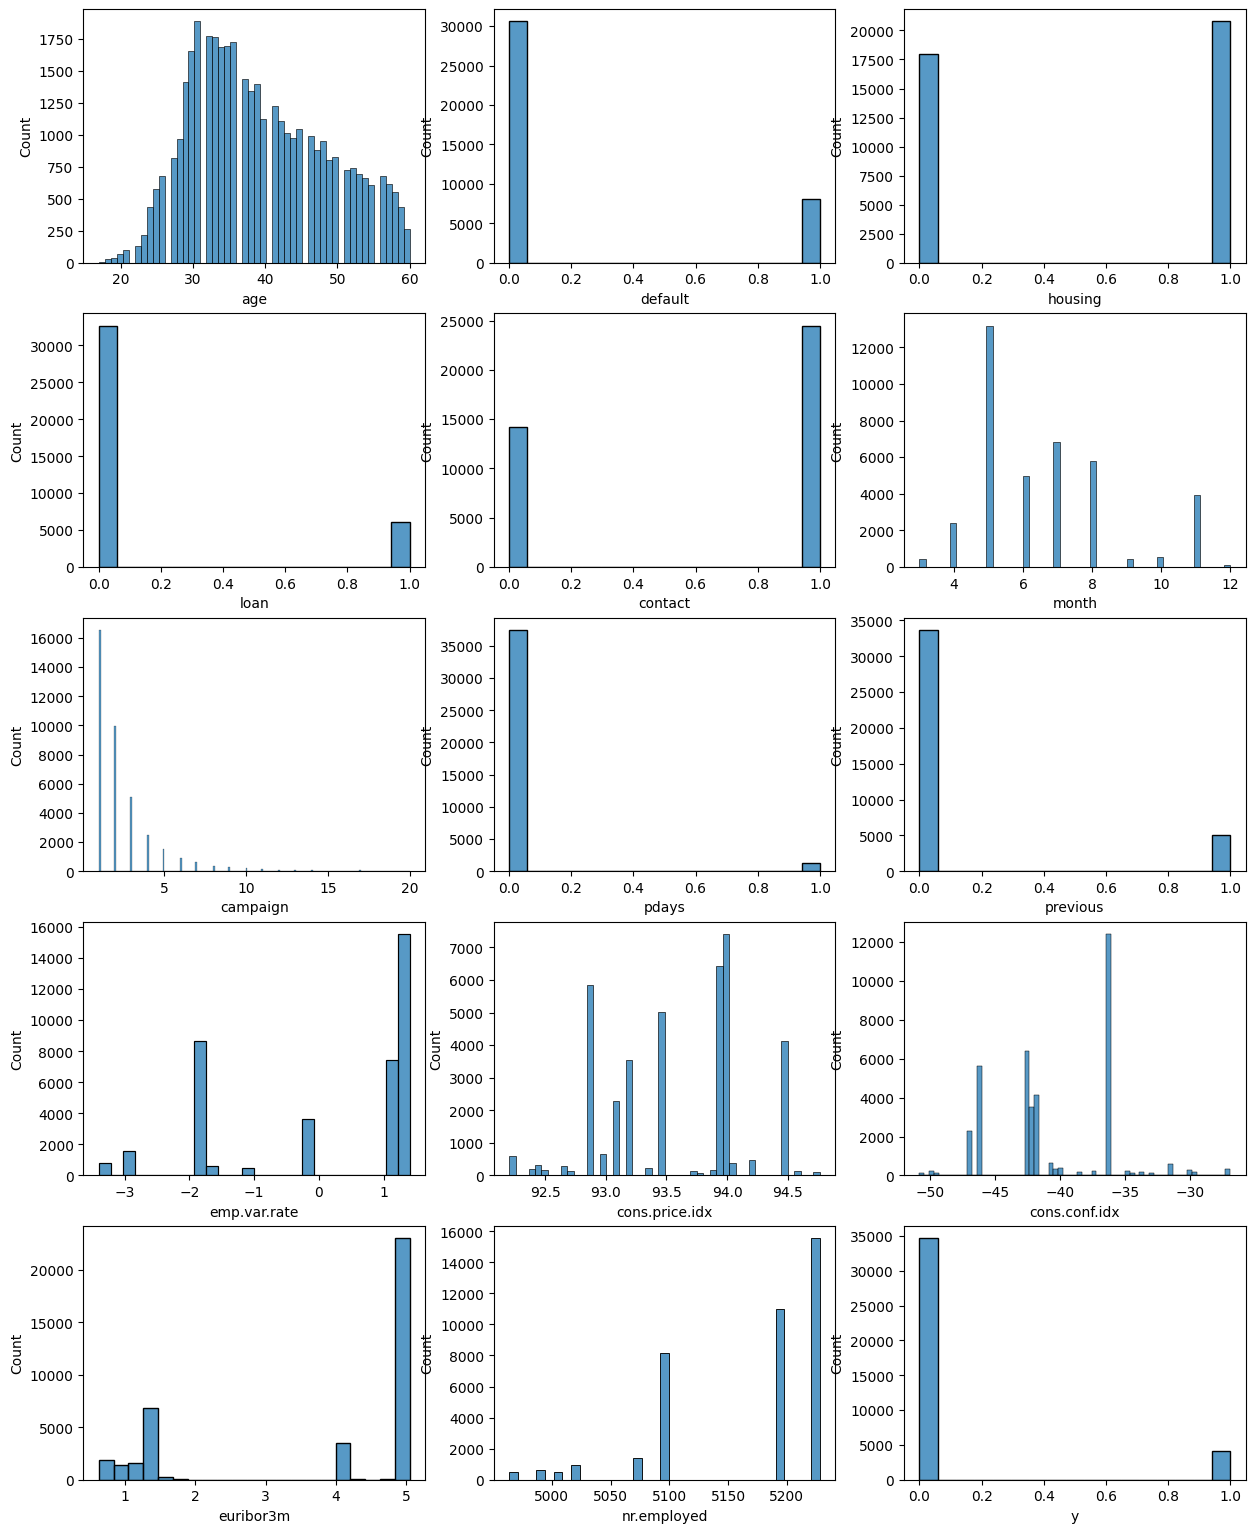

In [26]:
cols = df.columns
num_data = list(df._get_numeric_data().columns)
cat_data = list(set(cols) - set(num_data))

plot_num = 1
plt.figure(figsize = (15,27))
for i in num_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.histplot(data=df, x=i)
    plot_num += 1
plt.show()

##### Correct skewed data

In [27]:
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=1)
skewed_data_list = ['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
x = df[skewed_data_list].values
X_trans = quantile_transformer.fit_transform(x)
df[skewed_data_list] = X_trans

plot_num = 1
plt.figure(figsize = (15,27))
for i in num_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.histplot(data=df, x=i, kde = True)
    plot_num += 1
plt.show()

##### Correlation between numerical data and target
- the following list below has a high correlation with the target
    - default
    - contact
    - pdays
    - previous
    - emp.var.rate
    - cons.price.idx
    - euribor3m
    - nr.employed

<br>

- the following list below has a low correlation with target
    - age
    - housing
    - loan
    - month
    - cons.conf.idx
    - campaign

<br>

- the following pair below has a high correlation between feature we devide into 3 range as below

    - range 1: correlation 0.7 - 1
        - 0.96: emp.var.rate // nr.employed
        - 0.85: emp.var.rate // euribor3m
        - 0.84: euribor3m // nr.employed

        <br>

    - range 2: correlation 0.4 - 0.7
        - 0.54: contact // cons.price.idx
        - 0.47: pdays // previous
        - 0.47: emp.var.rate // cons.price.idx
        - 0.44: previous // euribor3m
        - 0.42: cons.price.idx // euribor3m
        
        <br>

    - range 3: correlation 0.2 - 0.4
        - 0.37: previous // nr.employed
        - 0.37: previous // emp.var.rate
        - 0.34: cons.prive.idx // nr.employed
        - 0.33: contact // month
        - 0.31: month // cons.conf.idx
        - 0.29: pdays // euribor3m
        - 0.22: pdays // nr.employed
        - 0.21: contact // previous
        - 0.20: age // default

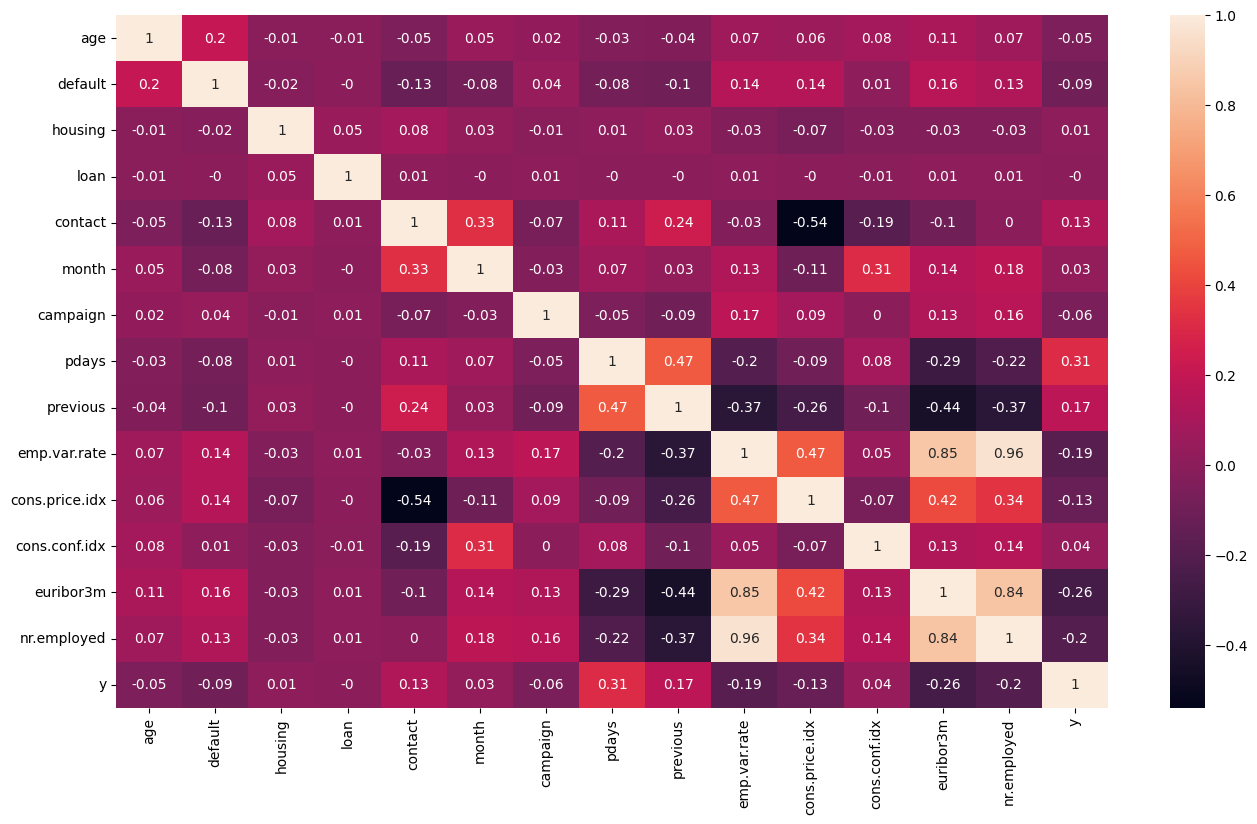

In [29]:
num_df = df[num_data]
plt.figure(figsize = (16,9))
sns.heatmap(round(df.corr(), 2), annot=True)
plt.show()

- using ANOVA to verify correlation

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif

x = num_df.iloc[:,:-1]
y = num_df['y']
anova = SelectKBest(f_classif, k=8)
x_new = anova.fit(x,y)

col = anova.get_support(indices=True)
x_new = x.iloc[:,col]
x_new.head()

default  contact  pdays  previous  emp.var.rate  cons.price.idx  euribor3m  \
0        0        0      0         0      0.006273        0.734798  -0.020074   
1        1        0      0         0      0.006273        0.734798  -0.020074   
2        0        0      0         0      0.006273        0.734798  -0.020074   
3        0        0      0         0      0.006273        0.734798  -0.020074   
4        0        0      0         0      0.006273        0.734798  -0.020074   

   nr.employed  
0    -0.227777  
1    -0.227777  
2    -0.227777  
3    -0.227777  
4    -0.227777

- Visualize data that have a high relation to the target
    - according to the figure below, it obviously show the separation of the target

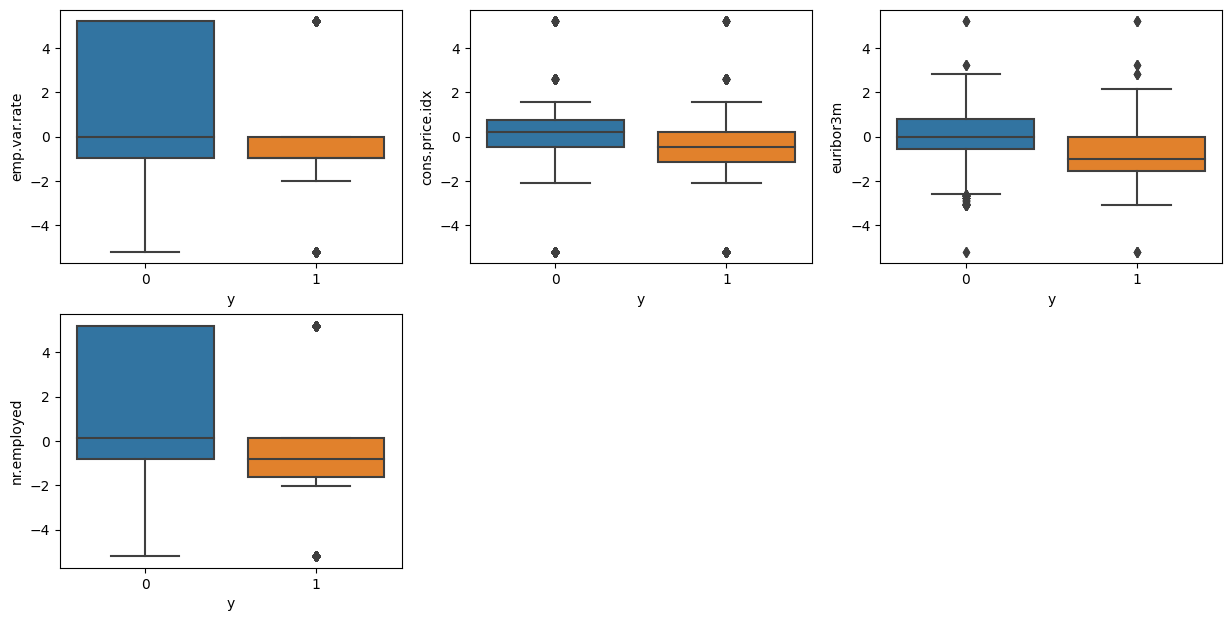

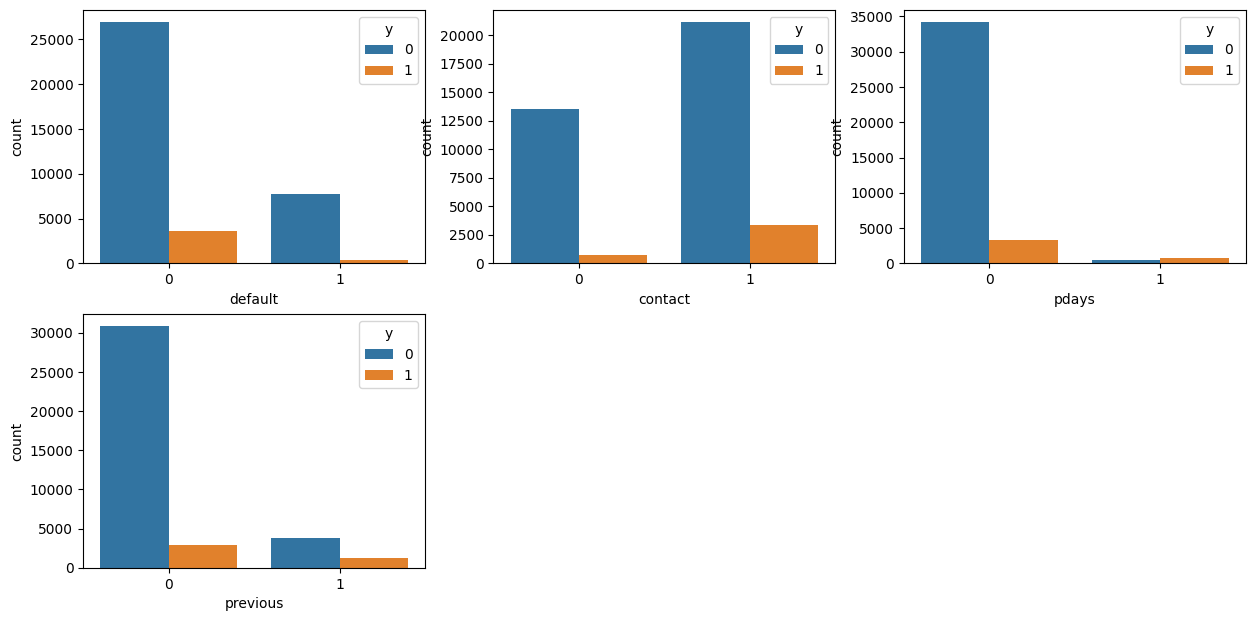

In [31]:
select_value_data = ['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
select_count_data = ['default', 'contact', 'pdays', 'previous']

plot_num = 1
plt.figure(figsize = (15,27))
for i in select_value_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.boxplot(data=df, x='y', y=i)
    plot_num += 1
plt.show()

plot_num = 1
plt.figure(figsize = (15,27))
for i in select_count_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.countplot(data=df, x=i, hue='y')
    plot_num += 1
plt.show()

- Visualize data that have a low relation to the target
    - according to the figure below the data will distribute on the same level. **This is the reason that support the removal of these data**

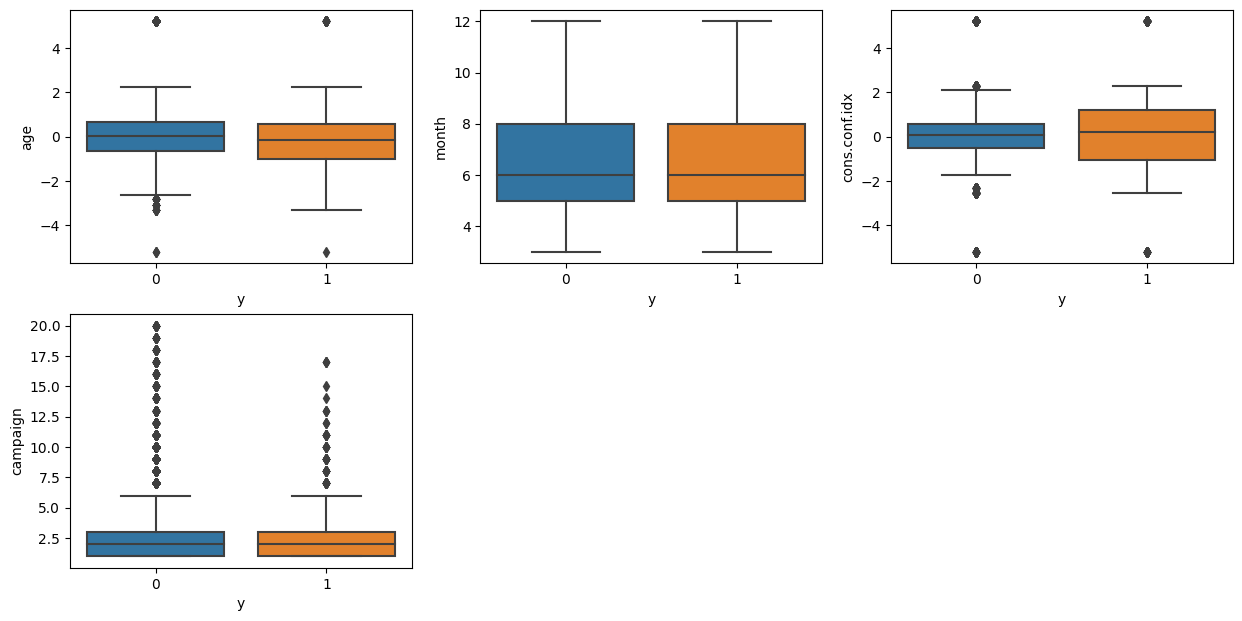

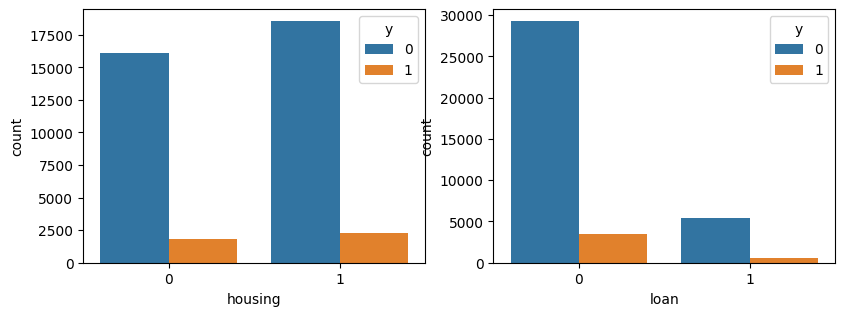

In [32]:
cut_value_data = ['age', 'month', 'cons.conf.idx', 'campaign']
cut_count_data = ['housing', 'loan']

plot_num = 1
plt.figure(figsize = (15,27))
for i in cut_value_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.boxplot(data=df, x='y', y=i)
    plot_num += 1
plt.show()

plot_num = 1
plt.figure(figsize = (15,27))
for i in cut_count_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.countplot(data=df, x=i, hue='y')
    plot_num += 1
plt.show()

**loan data seem to be clearly separated but in fact the ratio between target and loan data is the same ratio**

In [33]:
for i in range(2):
    a = df.loc[df['loan'] == i]
    count = a['y'].value_counts().values
    percent = (count[1]/(count[0] + count[1])) * 100
    print(f"loan = {i}: {percent:0.2f}%")

loan = 0: 10.56%
loan = 1: 10.25%


- Visualize data that have a high relation between feature

range 1: correlation 0.7 - 1
- all of 3 features below have a high correlation to each other
    - emp.var.rate
    - nr.employed
    - euribor3m
<br/>
<br>

- result
    - emp.var.rate and nr.employed values are very close to each other
    - select euribor3m feature to keep because it has the most correlation values and it more like normal distribution

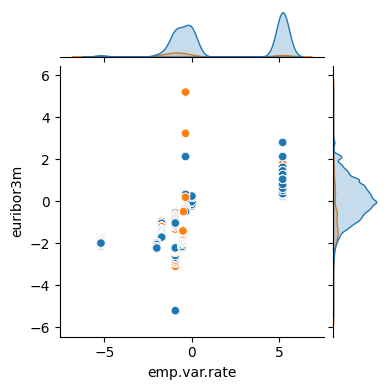

In [34]:
sns.jointplot(data = df, x = 'emp.var.rate', y = 'nr.employed', hue = 'y', height = 4, legend = False)
plt.show()
##### two data values are very close to each other therefore cut the lower correlation to target feature
sns.jointplot(data = df, x = 'emp.var.rate', y = 'euribor3m', hue = 'y', height = 4, legend = False)
plt.show()
sns.jointplot(data = df, x = 'euribor3m', y = 'nr.employed', hue = 'y', height = 4, legend = False)
plt.show()

range 2: correlation 0.4 - 0.7
- from range 1 we cut feature below
    - emp.var.rate
    - nr.employed
<br/>
<br/>

- in range 2 will have 4 pair
    - contact // cons.price.idx
    - pdays // previous
    - previous // euribor3m
    - cons.price.idx // euribor3m
<br/>
<br/>

- result
    - the graph between contact and cons.price.idx was seperate each other but not effect to the target therefore cut cons.price.idx feature because have lower correlation to the target
    - the graph between previous and euribor3m seem to be positive to our model we will see the relation of previous, euribor3m and target that separate range of each other
    - the graph between cons.price.idx and euribor3m does not obviously show the mathematical function therefore keep both

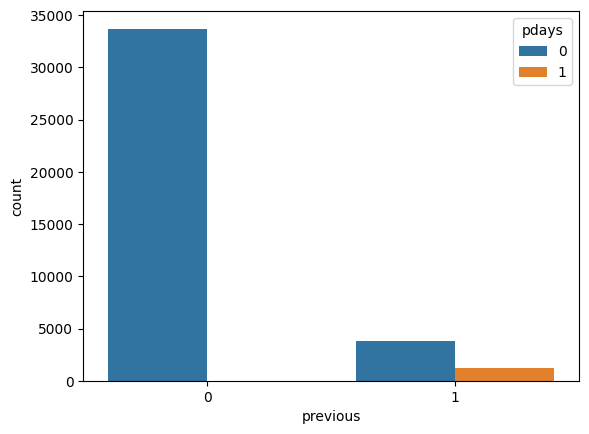

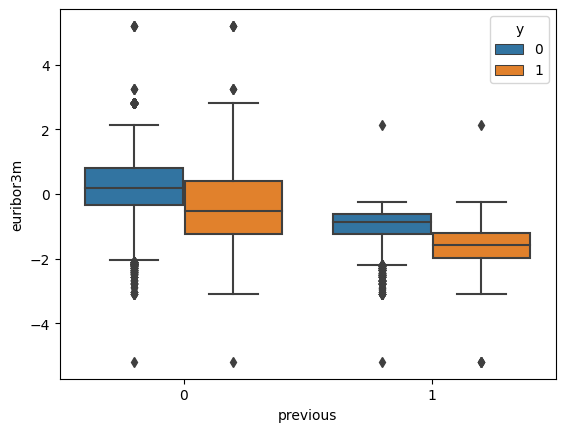

In [35]:
sns.boxplot(data = df, x = 'contact', y = 'cons.price.idx', hue = 'y')
plt.show()
sns.countplot(data = df, x = 'previous', hue = 'pdays')
plt.show()
sns.boxplot(data = df, x = 'previous', y = 'euribor3m', hue = 'y')
plt.show()
sns.jointplot(data = df, x = 'cons.price.idx', y = 'euribor3m', hue = 'y')
plt.show()

range 3: correlation 0.2 - 0.4
- from range 1 we cut feature below
    - cons.price.idx
<br/>
<br/>

- in range 3 will have 5 pair
    - contact // month
    - month // cons.conf.idx
    - pdays // euribor3m
    - contact // previous
    - age // default
<br/>
<br/>

- result
    - the graph between contact and month separate range from each other but not target so cut month data because have lower correlation to the target
    - the graph between age and default separate range from each other but not target so cut age data because have lower correlation to the target
    - the graph between pdays and euribor3m seem to be positive to the model and also the graph between contact and previous seem to be positive to the model

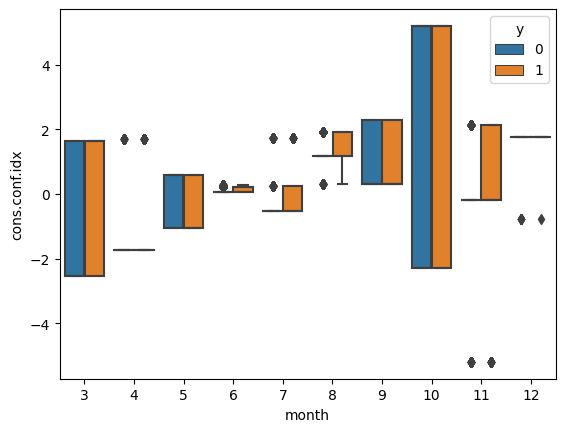

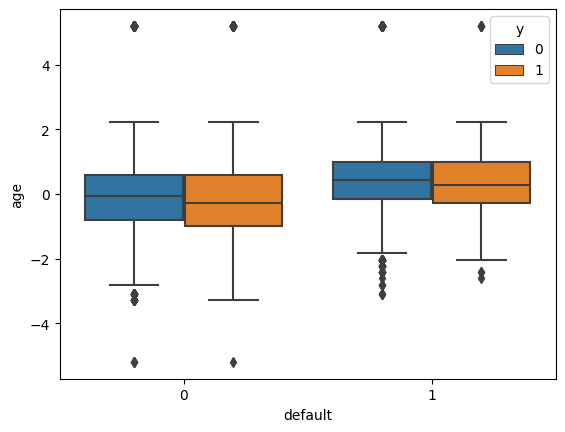

In [36]:
sns.boxplot(data = df, x = 'contact', y = 'month', hue = 'y')
plt.show()
sns.boxplot(data = df, x = 'month', y = 'cons.conf.idx', hue = 'y')
plt.show()
sns.boxplot(data = df, x = 'pdays', y = 'euribor3m', hue = 'y')
plt.show()
sns.boxplot(data = df, x = 'contact', y = 'previous', hue = 'y')
plt.show()
sns.boxplot(data = df, x = 'default', y = 'age', hue = 'y')
plt.show()

##### Correlation between categorical data and target 
- poutcome_nonexistent, poutcome_success and job_student have correlation to target
- other feature have few correlation to target so consider to cut all of them out except poutcome_nonexistent, poutcome_success and job_student

In [37]:
cat_df = df[cat_data]
cat_df = pd.get_dummies(cat_df)
cat_df['y'] = df['y']
plt.figure(figsize = (32,18))
sns.heatmap(round(cat_df.corr(),2),annot=True)
plt.show()

- using chi2 to verify correlation

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = cat_df.iloc[:,:-1]
y = cat_df['y']
chi_2 = SelectKBest(chi2, k=3)
x_new = chi_2.fit(x,y)

col = chi_2.get_support(indices=True)
x_new = x.iloc[:,col]
x_new.head()

poutcome_nonexistent  poutcome_success  job_student
0                     1                 0            0
1                     1                 0            0
2                     1                 0            0
3                     1                 0            0
4                     1                 0            0

##### Plot between categorical data and target
according to the heatmap above, we will see a lot of no relation between categorical data and target. **using countplot to verify them**
- result
    - day_of_week data seem to be useless data
    - some feature can group each other

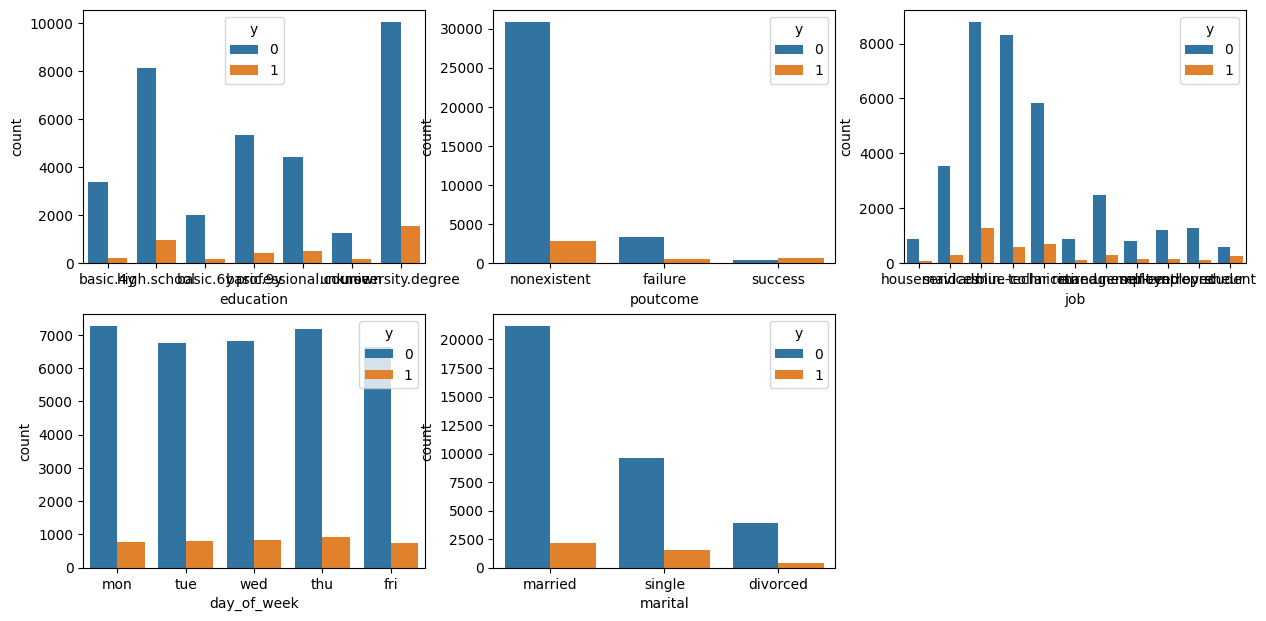

In [39]:
plot_num = 1
plt.figure(figsize = (15,27))
for i in cat_data:
    ax = plt.subplot(7, 3, plot_num)
    sns.countplot(data=df, x=i, hue='y')
    plot_num += 1
plt.show()

**try to group up some categorical feature except poutcome data in the reason that we previous see the correlation to the target**
- group education to degree and basic_school
- group job to have job and no job
- group marital to alone and not alone

result
- some data is more balanced
- correlation to the target is decrease

In [40]:
cat_df2 = df[cat_data].copy()
cat_df2['y'] = df['y']
cat_df2 = cat_df2.drop(['day_of_week'],axis=1)
##### education
degree = ['university.degree', 'professional.course']
basic_school = ['high.school', 'basic.9y', 'basic.4y', 'basic.6y', 'unknown']
cat_df2['education'] = cat_df2['education'].replace(degree, [1]*len(degree))
cat_df2['education'] = cat_df2['education'].replace(basic_school, [0]*len(basic_school))

##### job
have_job = ['admin.', 'blue-collar', 'technician', 'services', 'management', 'entrepreneur', 'self-employed', 'housemaid']
no_job = ['retired', 'unemployed', 'student']
cat_df2['job'] = cat_df2['job'].replace(have_job, [1]*len(have_job))
cat_df2['job'] = cat_df2['job'].replace(no_job, [0]*len(no_job))

##### marital
alone = ['single', 'divorced']
not_alone = ['married']
cat_df2['marital'] = cat_df2['marital'].replace(not_alone, [1]*len(not_alone))
cat_df2['marital'] = cat_df2['marital'].replace(alone, [0]*len(alone))


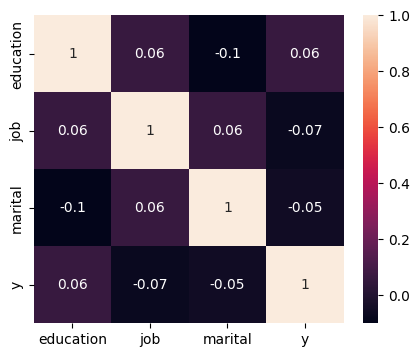

In [41]:
cat_df2_cols = cat_df2.columns
plot_num = 1
plt.figure(figsize = (15,27))
for i in cat_df2_cols:
    ax = plt.subplot(7, 3, plot_num)
    sns.countplot(data=cat_df2, x=i, hue='y')
    plot_num += 1
plt.show()

plt.figure(figsize = (5,4))
sns.heatmap(round(cat_df2.corr(), 2), annot=True)
plt.show()

##### Plot between categorical data and categorical data

- non-group categorical data
    - see nothing seems to benefit for model

In [42]:
plot_num = 1
plt.figure(figsize = (30,27))
for i in cat_data:
    for j in cat_data:
        ax = plt.subplot(5, 5, plot_num)
        sns.countplot(data=df, x=i, hue=j)
        plot_num += 1
plt.show()

- group categorical data
    - seem to be better than non-group categorical data especially the graph between target and education

In [43]:
plot_num = 1
plt.figure(figsize = (30,27))
for i in cat_df2_cols:
    for j in cat_df2_cols:
        ax = plt.subplot(5, 5, plot_num)
        sns.countplot(data=cat_df2, x=i, hue=j)
        plot_num += 1
plt.show()

##### Plot between categorical data and numerical data

- non-group categorical data
    - previous and euribor3m
    - pdays and euribor3m
    - poutcome and euribor3m

**the pair above have a relation to the target and we realize that euribor3m data is significant to target**

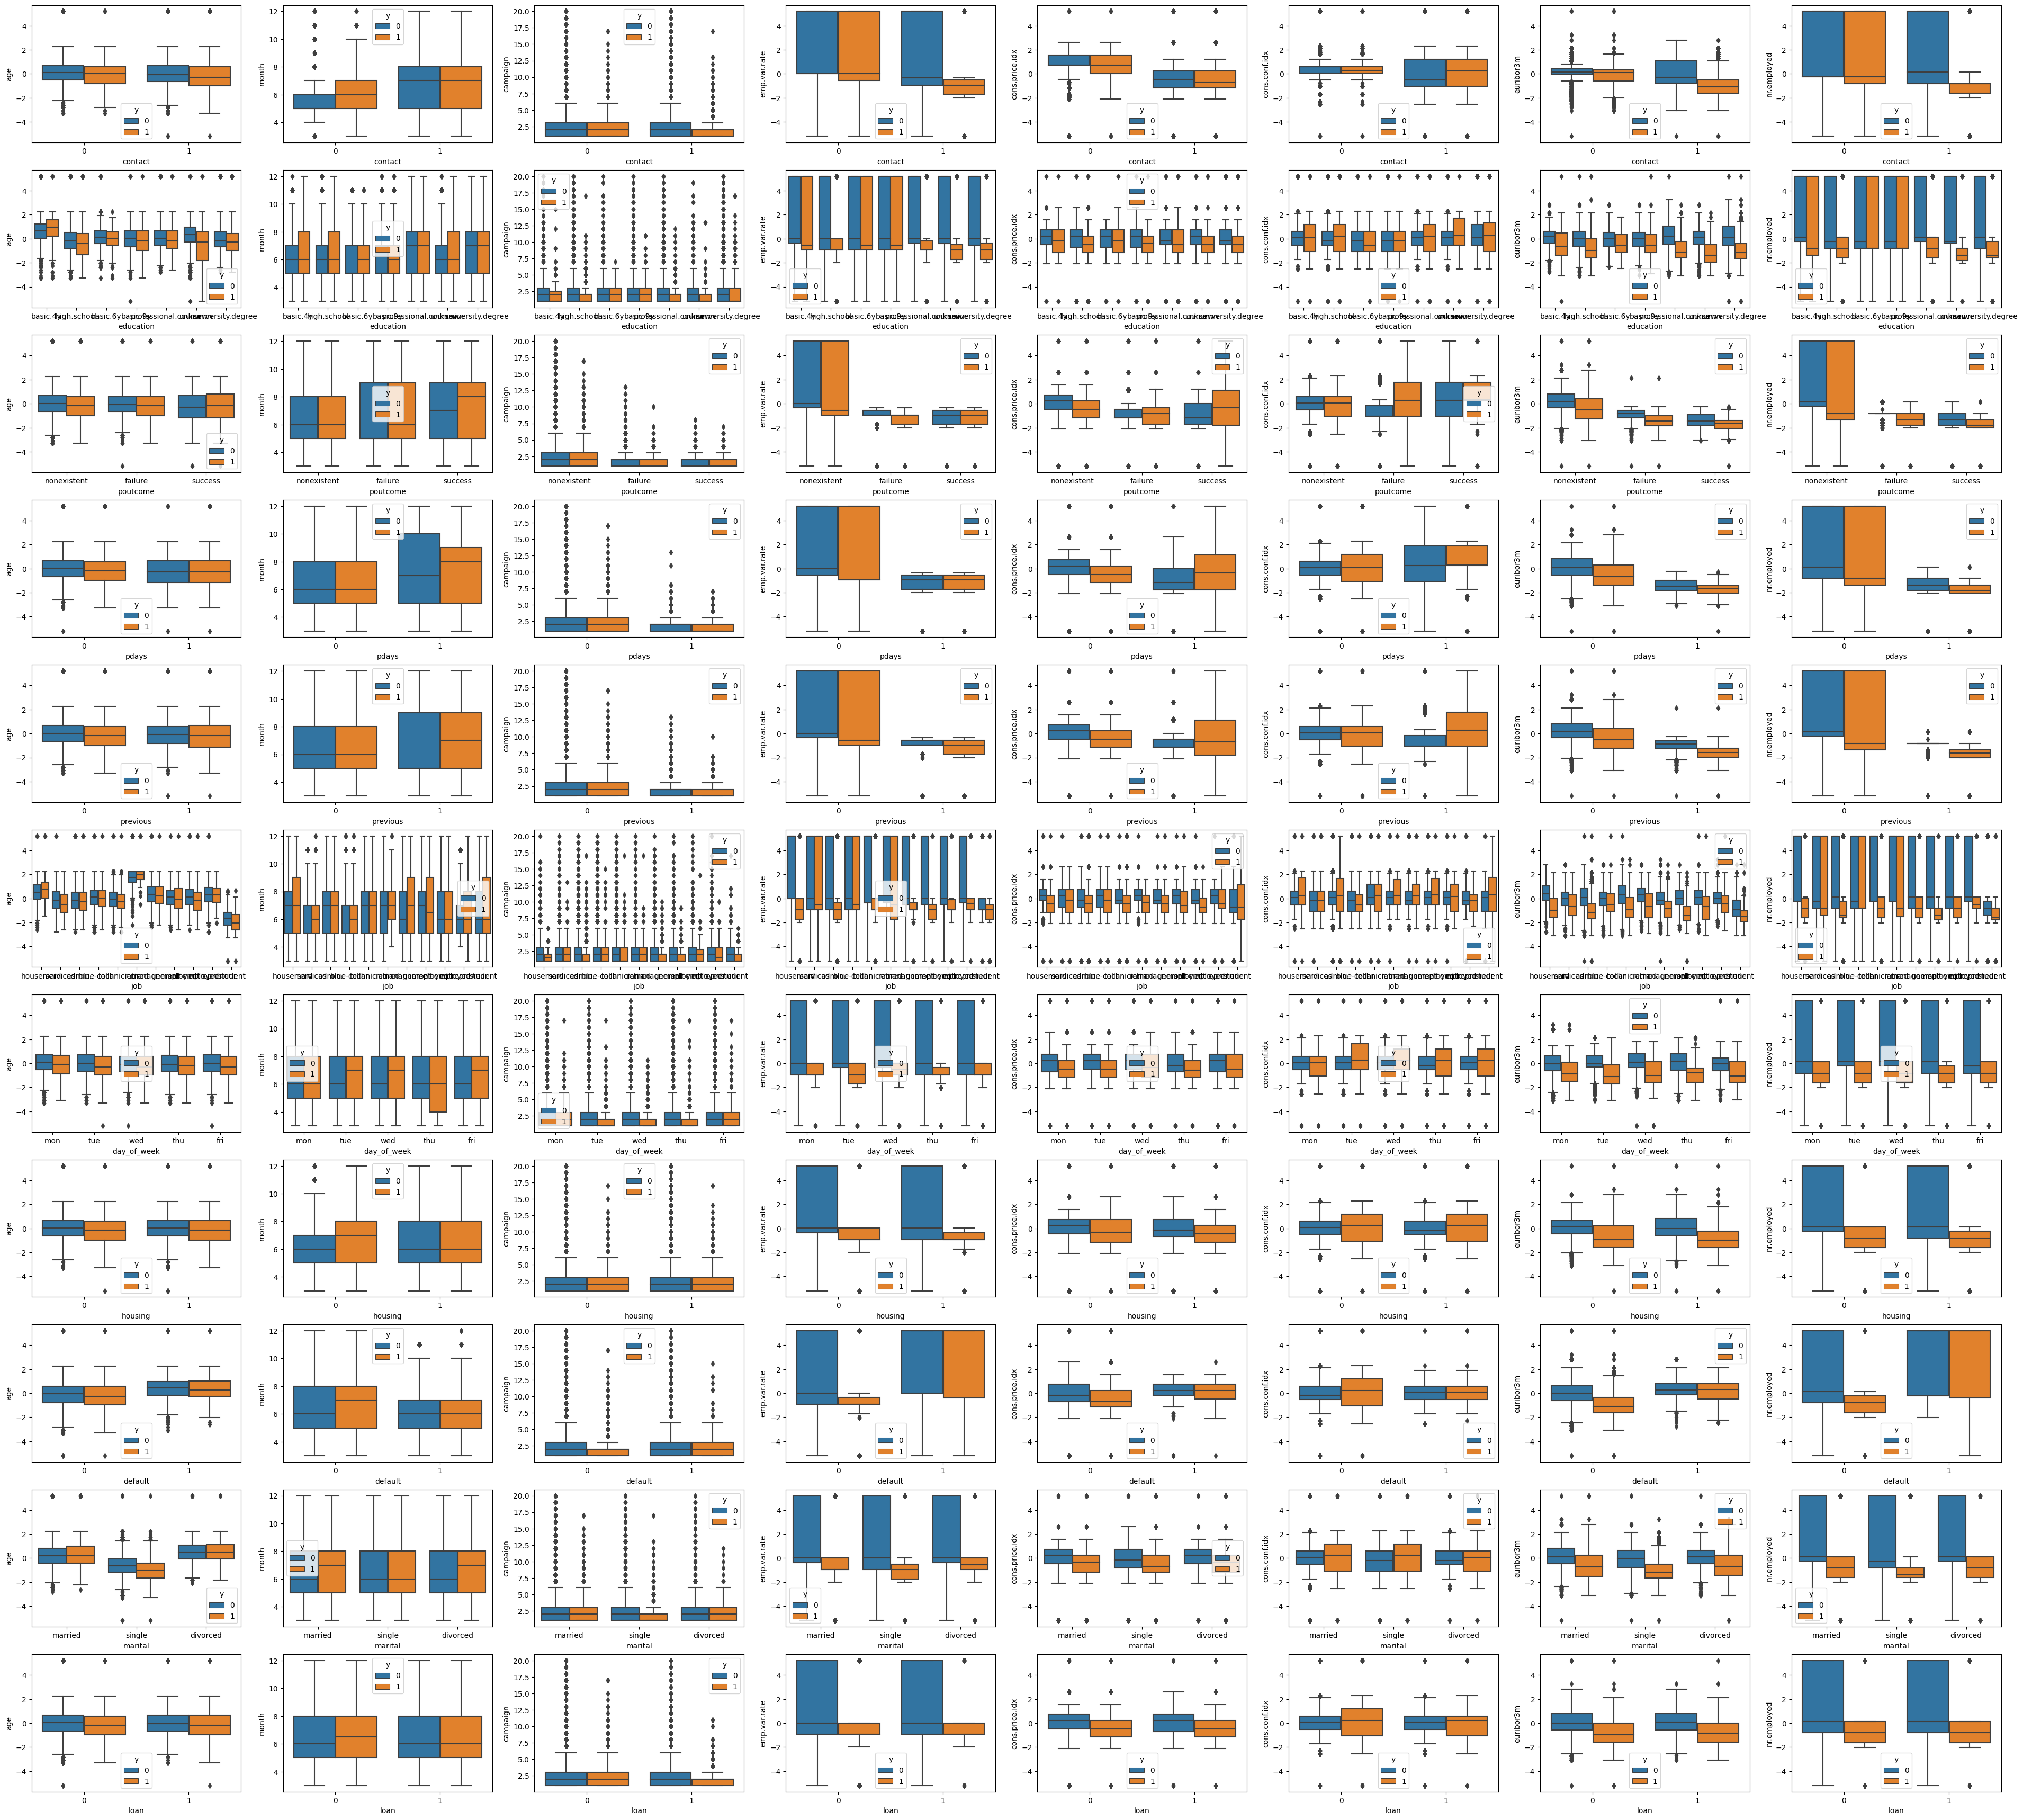

In [44]:
cols = df.columns
num_data = [ i for i in cols if (len(df[i].unique()) != 2 and df[i].dtype != 'object')]
cat_data = list(set(cols) - set(num_data))
cat_data.remove('y')
plot_num = 1
plt.figure(figsize = (48,60))
for i in cat_data:
    for j in num_data:
        ax = plt.subplot(15, 8, plot_num)
        sns.boxplot(data=df, x=i, y=j , hue='y')
        plot_num += 1
plt.show()

- group categorical data

the result is the same as non-group in this reason <span style="color:red">**we will use group dataframe to reduce the dimension**</span>

In [45]:
group_df = df.copy()
group_df[cat_df2_cols] = cat_df2[cat_df2_cols]
plot_num = 1
plt.figure(figsize = (48,60))
for i in cat_data:
    for j in num_data:
        ax = plt.subplot(15, 8, plot_num)
        sns.boxplot(data=group_df, x=i, y=j , hue='y')
        plot_num += 1
plt.show()

### Data Preprocessing


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy import stats
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

def removeOutlier(df:pd.DataFrame, remove_outlier:bool):
    if remove_outlier:
        ##### remove outlier
        df = df.loc[(df['age'] <= 60) & (df['campaign'] <= 20)]
        df['pdays'] = df['pdays'].replace([999], [-1])
        df = df.loc[(df['pdays'] <= 15) & 
                    (df['job'] != 'unknown') & 
                    (df['marital'] != 'unknown') & 
                    (df['housing'] != 'unknown') &
                    (df['loan'] != 'unknown') &
                    (df['default'] != 'yes') &
                    (df['education'] != 'illiterate')]
    return df

def convertCat2Num(df:pd.DataFrame):
    ##### change numerical data to categorical data
    df['month'] = df['month'].replace(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], list(range(1,13,1)))
    df['default'] = df['default'].replace(['no', 'unknown'], [0,1])
    df['loan'] = df['loan'].replace(['no', 'yes'], [0,1])
    df['housing'] = df['housing'].replace(['no', 'yes'], [0,1])
    df['contact'] = df['contact'].replace(['telephone', 'cellular'], [0,1])

    df['y'] = df['y'].replace(['no', 'yes'], [0, 1])
    return df
    
def groupData(df:pd.DataFrame, group_data:bool):
    if group_data:
        ### group numerical data
        ##### pdays group to yes or no
        df['pdays'] = df['pdays'].replace(list(range(16)), ([1]*16))
        df['pdays'] = df['pdays'].replace([-1], (0))
        #### previous value 0 is a lot
        df['previous'] = df['previous'].replace(list(range(1,16,1)), ([1]*15))
        ### group categorical data
        ###### education
        degree = ['university.degree', 'professional.course']
        basic_school = ['high.school', 'basic.9y', 'basic.4y', 'basic.6y', 'unknown']
        df['education'] = df['education'].replace(degree, [1]*len(degree))
        df['education'] = df['education'].replace(basic_school, [0]*len(basic_school))

        ##### job
        have_job = ['admin.', 'blue-collar', 'technician', 'services', 'management', 'entrepreneur', 'self-employed', 'housemaid']
        no_job = ['retired', 'unemployed', 'student']
        df['job'] = df['job'].replace(have_job, [1]*len(have_job))
        df['job'] = df['job'].replace(no_job, [0]*len(no_job))

        ##### marital
        alone = ['single', 'divorced']
        not_alone = ['married']
        df['marital'] = df['marital'].replace(not_alone, [1]*len(not_alone))
        df['marital'] = df['marital'].replace(alone, [0]*len(alone))    
    return df



def correctSkewed(df:pd.DataFrame, correct_skewed:bool):
    ##### correct skewed data
    if correct_skewed:
        quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=1)
        skewed_data_list = ['age','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
        x_skew = df[skewed_data_list].values
        X_trans = quantile_transformer.fit_transform(x_skew)
        df[skewed_data_list] = X_trans
    df_x = df.drop(['y'], axis=1)
    df_y = df['y']
    return df_x, df_y

def preprocessData(drop_list, select_list, remove_outlier:bool = True, group_data:bool = True, correct_skewed:bool = True):
    df = pd.read_csv('bank-additional-full.csv', sep=';')
    df = df.drop(['duration'], axis=1)
    df = removeOutlier(df, remove_outlier)
    df = convertCat2Num(df)
    df = groupData(df, group_data)
    df_x, df_y = correctSkewed(df, correct_skewed)
    if drop_list != None:
        df_x = df_x.drop(drop_list, axis = 1)
    elif select_list != None:
        df_x = df_x[select_list] 
    df_x = pd.get_dummies(df_x)
    x = df_x.values
    y = df_y.values
    scaler = StandardScaler()
    x_scale = scaler.fit_transform(x)
    
    return x_scale, y

### Model Construction and Analysis

- decition tree

In [2]:
def trainDecisionTree(drop_list, select_list, remove_outlier:bool = True, group_data:bool = True, correct_skewed:bool = True):
    ##### get x and y data from preprocessing
    x, y = preprocessData(drop_list, select_list, remove_outlier, group_data, correct_skewed)
    ##### Split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

    ##### Declare model and model parameters
    model = DecisionTreeClassifier(random_state=1)
    parameters = {'criterion':("gini", "entropy"),
                  'splitter':("best", "random"),
                  'max_depth':list(range(3,22,3))}

    ##### Train model with gridsearchCV and split k-fold = 10
    clf = GridSearchCV(model, parameters, scoring='f1', verbose=3, return_train_score=True, n_jobs=-1, cv = 10)
    clf.fit(x_train, y_train)

    ##### Test model, visualize classification report and confusion matrix
    print(clf.best_params_)
    y_pred = clf.predict(x_test)
    print("Decision Tree Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Decision Tree Confusion matrix \n=======================")
    #print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    #ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    #plt.show()

    return clf

- Random Forest

In [3]:
def trainRandomForest(drop_list, select_list, remove_outlier:bool = True, group_data:bool = True, correct_skewed:bool = True):
    ##### get x and y data from preprocessing
    x, y = preprocessData(drop_list, select_list, remove_outlier, group_data, correct_skewed)
    ##### Split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

    ##### Declare model and model parameters
    model = RandomForestClassifier(random_state=1)
    parameters = {'criterion':("gini", "entropy"),
                  'n_estimators': [50, 100, 150, 200, 250],
                  'max_depth':list(range(3,22,3))}

    ##### Train model with gridsearchCV and split k-fold = 10
    clf = GridSearchCV(model, parameters, scoring='f1', verbose=3, return_train_score=True, n_jobs=-1, cv = 10)
    clf.fit(x_train, y_train)

    ##### Test model, visualize classification report and confusion matrix
    print(clf.best_params_)
    y_pred = clf.predict(x_test)
    print("Random Forest Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Random Forest Confusion matrix \n=======================")
    #print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    #ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    #plt.show()

    return clf

- KNN

In [4]:
def trainKNN(drop_list, select_list, remove_outlier:bool = True, group_data:bool = True, correct_skewed:bool = True):
    ##### get x and y data from preprocessing
    x, y = preprocessData(drop_list, select_list, remove_outlier, group_data, correct_skewed)
    ##### Split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

    ##### Declare model and model parameters
    model = KNeighborsClassifier(n_neighbors=5, algorithm='auto', weights='distance')
    model.fit(x_train, y_train)

    ##### Test model, visualize classification report and confusion matrix
    y_pred = model.predict(x_test)
    print("KNN Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("KNN Confusion matrix \n=======================")
    #print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    #ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    #plt.show()

    return model

- Neural network

In [5]:
def trainNeural(drop_list, select_list, remove_outlier:bool = True, group_data:bool = True, correct_skewed:bool = True):
    ##### get x and y data from preprocessing
    x, y = preprocessData(drop_list, select_list, remove_outlier, group_data, correct_skewed)
    ##### Split train and test data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
    lst = []
    for i in range(1,3,1): ##### max 2 layers
        comb = itertools.combinations(range(1,9,1), i) ####### max 8 neuron
        for val in comb:
            lst.append(val)
    ##### Declare model and model parameters
    model = MLPClassifier(random_state=1, learning_rate='adaptive')
    parameters = {'hidden_layer_sizes': lst,
                  'activation': ('identity', 'logistic', 'tanh', 'relu')}

    ##### Train model with gridsearchCV and split k-fold = 10
    clf = GridSearchCV(model, parameters, scoring='f1', verbose=3, return_train_score=True, n_jobs=-1, cv = 10)
    clf.fit(x_train, y_train)

    ##### Test model, visualize classification report and confusion matrix
    print(clf.best_params_)
    y_pred = clf.predict(x_test)
    print("Neural Network Classification report \n=======================")
    print(classification_report(y_true=y_test, y_pred=y_pred))
    print("Neural Network Confusion matrix \n=======================")
    #print(confusion_matrix(y_true=y_test, y_pred=y_pred))
    #ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    #plt.show()

    return clf

##### EXP 1 preprocessing data

- train raw data

In [6]:
drop_list = None
select_list = None
decitionTree = trainDecisionTree(drop_list, select_list, remove_outlier=False, group_data=False, correct_skewed=False)
randomforest = trainRandomForest(drop_list, select_list, remove_outlier=False, group_data=False, correct_skewed=False)
KNN = trainKNN(drop_list, select_list, remove_outlier=False, group_data=False, correct_skewed=False)
neural = trainNeural(drop_list, select_list, remove_outlier=False, group_data=False, correct_skewed=False)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'best'}
Decision Tree Classification report 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7294
           1       0.53      0.30      0.38       944

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238

Decision Tree Confusion matrix 
Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'criterion': 'entropy', 'max_depth': 21, 'n_estimators': 150}
Random Forest Classification report 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7294
           1       0.61      0.28      0.39       944

    accuracy                           0.90      8238
   macro avg       0.76      0.63      0.67      8238
weighted avg       0.88      0.90      0.88 

- train all of data with preprocessing

In [7]:
drop_list = None
select_list = None
decitionTree = trainDecisionTree(drop_list, select_list)
randomforest = trainRandomForest(drop_list, select_list)
KNN = trainKNN(drop_list, select_list)
neural = trainNeural(drop_list, select_list)

C:\Users\thana\Desktop\TheShit\FRA503\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'best'}
Decision Tree Classification report 
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6902
           1       0.54      0.27      0.36       844

    accuracy                           0.90      7746
   macro avg       0.73      0.62      0.65      7746
weighted avg       0.88      0.90      0.88      7746

Decision Tree Confusion matrix 


C:\Users\thana\Desktop\TheShit\FRA503\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'criterion': 'entropy', 'max_depth': 18, 'n_estimators': 100}
Random Forest Classification report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6902
           1       0.59      0.28      0.38       844

    accuracy                           0.90      7746
   macro avg       0.76      0.63      0.66      7746
weighted avg       0.88      0.90      0.88      7746

Random Forest Confusion matrix 


C:\Users\thana\Desktop\TheShit\FRA503\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


KNN Classification report 
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      6902
           1       0.42      0.24      0.31       844

    accuracy                           0.88      7746
   macro avg       0.66      0.60      0.62      7746
weighted avg       0.86      0.88      0.87      7746

KNN Confusion matrix 


C:\Users\thana\Desktop\TheShit\FRA503\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'activation': 'relu', 'hidden_layer_sizes': (3, 6)}
Neural Network Classification report 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6902
           1       0.62      0.27      0.38       844

    accuracy                           0.90      7746
   macro avg       0.77      0.63      0.66      7746
weighted avg       0.88      0.90      0.89      7746

Neural Network Confusion matrix 


- analysis


<table style="margin-left:auto;margin-right:auto;">
    <thead>
        <tr>
            <th rowspan=2 colspan=2 style="text-align:center"></th>
            <th colspan=3 style="text-align:center"> Decision tree </th>
            <th colspan=3 style="text-align:center"> Random forest </th>
            <th colspan=3 style="text-align:center"> KNN </th>
            <th colspan=3 style="text-align:center"> Neural network </th>
        </tr>
        <tr>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2 style="text-align:center">Class 0</td>
            <td style="text-align:center">raw data</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.96</td>
            <td style="text-align:center">0.93</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
        </tr>
        <tr>
            <td style="text-align:center">preprocess</td>
            <td style="text-align:center">0.92</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.92</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.95</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.96</td>
            <td style="text-align:center">0.93</td>
            <td style="text-align:center">0.92</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.95</td>
        </tr>
        <tr>
            <td rowspan=2 style="text-align:center">Class 1</td>
            <td style="text-align:center">raw data</td>
            <td style="text-align:center">0.53</td>
            <td style="text-align:center">0.30</td>
            <td style="text-align:center">0.38</td>
            <td style="text-align:center">0.61</td>
            <td style="text-align:center">0.28</td>
            <td style="text-align:center">0.39</td>
            <td style="text-align:center">0.45</td>
            <td style="text-align:center">0.27</td>
            <td style="text-align:center">0.34</td>
            <td style="text-align:center">0.61</td>
            <td style="text-align:center">0.29</td>
            <td style="text-align:center">0.40</td>
        </tr>
        <tr>
            <td style="text-align:center">preprocess</td>
            <td style="text-align:center">0.54</td>
            <td style="text-align:center">0.27</td>
            <td style="text-align:center">0.36</td>
            <td style="text-align:center">0.59</td>
            <td style="text-align:center">0.28</td>
            <td style="text-align:center">0.38</td>
            <td style="text-align:center">0.42</td>
            <td style="text-align:center">0.24</td>
            <td style="text-align:center">0.31</td>
            <td style="text-align:center">0.62</td>
            <td style="text-align:center">0.27</td>
            <td style="text-align:center">0.38</td>
        </tr>
    </tbody>
</table>


*as the result shows that in the model with preprocessing data, class 0 has better performance but in the other way class 1 has the worse performance we guess that the cause of this problem is effect by the remove outlier function we may remove the outlier that has buck of class 1 data so let consider again*

In [48]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.drop(['duration'], axis=1)
df2 = removeOutlier(df, True)
count, count1 = df['y'].value_counts().values, df2['y'].value_counts().values
percent, percent1 = (count[1]/(count[0] + count[1])) * 100, (count1[1]/(count1[0] + count1[1])) * 100
print(f"target rawdata: {percent:0.2f}%")
print(f"target remove outlier data: {percent1:0.2f}%")


target rawdata: 11.27%
target remove outlier data: 10.51%


c:\Users\thana\Desktop\TheShit\FRA503\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<span style="color:red">***we will see the ratio of the dataset that remove outlier is less than rawdata 0.76%***</span>

- prove assumption
<br>

*when we using function **removeoutlier()** the target is more imbalance and it not good for model lets prove our assumption*

In [8]:
drop_list = None
select_list = None
decitionTree = trainDecisionTree(drop_list, select_list, remove_outlier=False)
randomforest = trainRandomForest(drop_list, select_list, remove_outlier=False)
KNN = trainKNN(drop_list, select_list, remove_outlier=False)
neural = trainNeural(drop_list, select_list, remove_outlier=False)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'best'}
Decision Tree Classification report 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7294
           1       0.54      0.29      0.38       944

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88      8238

Decision Tree Confusion matrix 
Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'criterion': 'gini', 'max_depth': 18, 'n_estimators': 150}
Random Forest Classification report 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7294
           1       0.60      0.29      0.39       944

    accuracy                           0.90      8238
   macro avg       0.75      0.63      0.67      8238
weighted avg       0.88      0.90      0.88    

- conclusion

<table style="margin-left:auto;margin-right:auto;">
    <thead>
        <tr>
            <th rowspan=2 colspan=2 style="text-align:center"></th>
            <th colspan=3 style="text-align:center"> Decision tree </th>
            <th colspan=3 style="text-align:center"> Random forest </th>
            <th colspan=3 style="text-align:center"> KNN </th>
            <th colspan=3 style="text-align:center"> Neural network </th>
        </tr>
        <tr>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=3 style="text-align:center">Class 0</td>
            <td style="text-align:center">raw data</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.96</td>
            <td style="text-align:center">0.93</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
        </tr>
        <tr>
            <td style="text-align:center">preprocess</td>
            <td style="text-align:center">0.92</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.92</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.95</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.96</td>
            <td style="text-align:center">0.93</td>
            <td style="text-align:center">0.92</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.95</td>
        </tr>
        <tr>
            <td style="text-align:center">w/outlier</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.96</td>
            <td style="text-align:center">0.93</td>
            <td style="text-align:center">0.92</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
        </tr>
        <tr>
            <td rowspan=3 style="text-align:center">Class 1</td>
            <td style="text-align:center">raw data</td>
            <td style="text-align:center">0.53</td>
            <td style="text-align:center">0.30</td>
            <td style="text-align:center">0.38</td>
            <td style="text-align:center">0.61</td>
            <td style="text-align:center">0.28</td>
            <td style="text-align:center">0.39</td>
            <td style="text-align:center">0.45</td>
            <td style="text-align:center">0.27</td>
            <td style="text-align:center">0.34</td>
            <td style="text-align:center">0.61</td>
            <td style="text-align:center">0.29</td>
            <td style="text-align:center">0.40</td>
        </tr>
        <tr>
            <td style="text-align:center">preprocess</td>
            <td style="text-align:center">0.54</td>
            <td style="text-align:center">0.27</td>
            <td style="text-align:center">0.36</td>
            <td style="text-align:center">0.59</td>
            <td style="text-align:center">0.28</td>
            <td style="text-align:center">0.38</td>
            <td style="text-align:center">0.42</td>
            <td style="text-align:center">0.24</td>
            <td style="text-align:center">0.31</td>
            <td style="text-align:center">0.62</td>
            <td style="text-align:center">0.27</td>
            <td style="text-align:center">0.38</td>
        </tr>
        <tr>
            <td style="text-align:center">w/outlier</td>
            <td style="text-align:center">0.54</td>
            <td style="text-align:center">0.29</td>
            <td style="text-align:center">0.38</td>
            <td style="text-align:center">0.60</td>
            <td style="text-align:center">0.29</td>
            <td style="text-align:center">0.39</td>
            <td style="text-align:center">0.44</td>
            <td style="text-align:center">0.26</td>
            <td style="text-align:center">0.32</td>
            <td style="text-align:center">0.57</td>
            <td style="text-align:center">0.32</td>
            <td style="text-align:center">0.41</td>
        </tr>
    </tbody>
</table>

*the model that does not remove the outlier is better than the full preprocessing process as the result shows better f1-score in class 1*
<br>
*and class 0 performance close to raw data*

##### EXP 2 Select good feature

- Group 1 : select features that have high correlation to target as listed below
    - default
    - contact
    - pdays
    - previous
    - emp.var.rate
    - cons.price.idx
    - euribor3m
    - nr.employed

In [9]:
drop_list = None
select_list = ['default', 'contact', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
decitionTree = trainDecisionTree(drop_list, select_list, remove_outlier=False)
randomforest = trainRandomForest(drop_list, select_list, remove_outlier=False)
KNN = trainKNN(drop_list, select_list, remove_outlier=False)
neural = trainNeural(drop_list, select_list, remove_outlier=False)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'criterion': 'gini', 'max_depth': 12, 'splitter': 'best'}
Decision Tree Classification report 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7294
           1       0.62      0.30      0.40       944

    accuracy                           0.90      8238
   macro avg       0.77      0.64      0.67      8238
weighted avg       0.88      0.90      0.88      8238

Decision Tree Confusion matrix 
Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'criterion': 'gini', 'max_depth': 12, 'n_estimators': 150}
Random Forest Classification report 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7294
           1       0.60      0.28      0.38       944

    accuracy                           0.90      8238
   macro avg       0.76      0.63      0.66      8238
weighted avg       0.88      0.90      0.88      8

- Group 2 : select more features that seem to be benefit to model as listed below
    - Poutcome_nonexistent
    - Poutcome_success
    - Job_student

In [10]:
drop_list = None
select_list = ['default', 'contact', 'pdays', 'previous', 'cons.price.idx', 'euribor3m', 'poutcome', 'job']
decitionTree = trainDecisionTree(drop_list, select_list, remove_outlier=False)
randomforest = trainRandomForest(drop_list, select_list, remove_outlier=False)
KNN = trainKNN(drop_list, select_list, remove_outlier=False)
neural = trainNeural(drop_list, select_list, remove_outlier=False)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}
Decision Tree Classification report 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7294
           1       0.63      0.29      0.39       944

    accuracy                           0.90      8238
   macro avg       0.77      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238

Decision Tree Confusion matrix 
Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 200}
Random Forest Classification report 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7294
           1       0.59      0.27      0.37       944

    accuracy                           0.89      8238
   macro avg       0.75      0.62      0.66      8238
weighted avg       0.87      0.89      0.88      82

- analysis


<table style="margin-left:auto;margin-right:auto;">
    <thead>
        <tr>
            <th rowspan=2 colspan=2 style="text-align:center"></th>
            <th colspan=3 style="text-align:center"> Decision tree </th>
            <th colspan=3 style="text-align:center"> Random forest </th>
            <th colspan=3 style="text-align:center"> KNN </th>
            <th colspan=3 style="text-align:center"> Neural network </th>
        </tr>
        <tr>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2 style="text-align:center">Class 0</td>
            <td style="text-align:center">group 1</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.92</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.95</td>
        </tr>
        <tr>
            <td style="text-align:center">group 2</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.92</td>
            <td style="text-align:center">0.96</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.95</td>
        </tr>
        <tr>
            <td rowspan=2 style="text-align:center">Class 1</td>
            <td style="text-align:center">group 1</td>
            <td style="text-align:center">0.62</td>
            <td style="text-align:center">0.30</td>
            <td style="text-align:center">0.40</td>
            <td style="text-align:center">0.60</td>
            <td style="text-align:center">0.28</td>
            <td style="text-align:center">0.38</td>
            <td style="text-align:center">0.56</td>
            <td style="text-align:center">0.31</td>
            <td style="text-align:center">0.40</td>
            <td style="text-align:center">0.68</td>
            <td style="text-align:center">0.24</td>
            <td style="text-align:center">0.36</td>
        </tr>
        <tr>
            <td style="text-align:center">group 2</td>
            <td style="text-align:center">0.63</td>
            <td style="text-align:center">0.29</td>
            <td style="text-align:center">0.39</td>
            <td style="text-align:center">0.59</td>
            <td style="text-align:center">0.27</td>
            <td style="text-align:center">0.37</td>
            <td style="text-align:center">0.52</td>
            <td style="text-align:center">0.32</td>
            <td style="text-align:center">0.40</td>
            <td style="text-align:center">0.63</td>
            <td style="text-align:center">0.29</td>
            <td style="text-align:center">0.40</td>
        </tr>
    </tbody>
</table>

*For Class 0 , its performance barely changes but for Class 1 the performance is getting worse slightly, So we assume that the new data that has been added is affect to model and made it got worse maybe it because they are correlated with themself or previously selected data*

- plot heatmap with selected data
<br>

*According to the heat map.we can see the features that have been added to the list  such as outcome or job, Only a few of their classes got good correlation scores but we trained this model with all of their class so the classes that got bad correlation scores affect the model and make it worse*

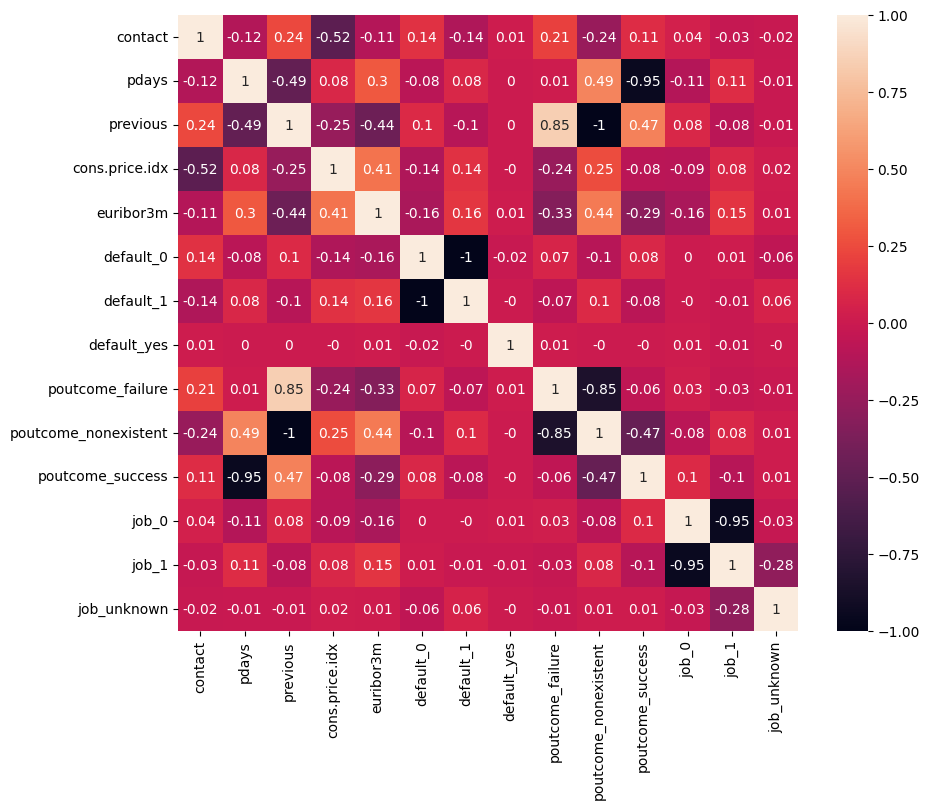

In [14]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df = df.drop(['duration'], axis=1)
df = removeOutlier(df, False)
df = convertCat2Num(df)
df = groupData(df, True)
df_x, df_y = correctSkewed(df, True)
df_x['y'] = df_y
select_list = ['default', 'contact', 'pdays', 'previous', 'cons.price.idx', 'euribor3m', 'poutcome', 'job']

df1 = df_x[select_list]
df1 = pd.get_dummies(df1)

plt.figure(figsize = (10,8))
sns.heatmap(round(df1.corr(),2),annot=True)
plt.show()

##### EXP 3 Cut bad feature

- Group 3 : train all features except low correlation data to target as listed below
    - age
    - housing
    - loan
    - month
    - cons.conf.idx
    - campaign

In [11]:
drop_list = ['age', 'housing', 'loan', 'month', 'cons.conf.idx', 'campaign']
select_list = None
decitionTree = trainDecisionTree(drop_list, select_list, remove_outlier=False)
randomforest = trainRandomForest(drop_list, select_list, remove_outlier=False)
KNN = trainKNN(drop_list, select_list, remove_outlier=False)
neural = trainNeural(drop_list, select_list, remove_outlier=False)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'criterion': 'entropy', 'max_depth': 12, 'splitter': 'best'}
Decision Tree Classification report 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7294
           1       0.59      0.26      0.36       944

    accuracy                           0.89      8238
   macro avg       0.75      0.62      0.65      8238
weighted avg       0.87      0.89      0.88      8238

Decision Tree Confusion matrix 
Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'criterion': 'entropy', 'max_depth': 21, 'n_estimators': 200}
Random Forest Classification report 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7294
           1       0.55      0.30      0.38       944

    accuracy                           0.89      8238
   macro avg       0.73      0.63      0.66      8238
weighted avg       0.87      0.89      0.88 

- Group 4 : cut more data with the data that have a correlation between features as listed below
    - Emp.var.rate
    - Nr.employed

In [12]:
drop_list = ['age', 'housing', 'loan', 'month', 'cons.conf.idx', 'campaign', 'emp.var.rate', 'nr.employed']
select_list = None
decitionTree = trainDecisionTree(drop_list, select_list, remove_outlier=False)
randomforest = trainRandomForest(drop_list, select_list, remove_outlier=False)
KNN = trainKNN(drop_list, select_list, remove_outlier=False)
neural = trainNeural(drop_list, select_list, remove_outlier=False)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
{'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}
Decision Tree Classification report 
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7294
           1       0.63      0.28      0.39       944

    accuracy                           0.90      8238
   macro avg       0.77      0.63      0.67      8238
weighted avg       0.88      0.90      0.88      8238

Decision Tree Confusion matrix 
Fitting 10 folds for each of 70 candidates, totalling 700 fits
{'criterion': 'gini', 'max_depth': 21, 'n_estimators': 250}
Random Forest Classification report 
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7294
           1       0.53      0.29      0.37       944

    accuracy                           0.89      8238
   macro avg       0.72      0.63      0.66      8238
weighted avg       0.87      0.89      0.87      82

- analysis

<table style="margin-left:auto;margin-right:auto;">
    <thead>
        <tr>
            <th rowspan=2 colspan=2 style="text-align:center"></th>
            <th colspan=3 style="text-align:center"> Decision tree </th>
            <th colspan=3 style="text-align:center"> Random forest </th>
            <th colspan=3 style="text-align:center"> KNN </th>
            <th colspan=3 style="text-align:center"> Neural network </th>
        </tr>
        <tr>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
            <th style="text-align:center"> precision </th>
            <th style="text-align:center"> recall </th>
            <th style="text-align:center"> f1-score </th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td rowspan=2 style="text-align:center">Class 0</td>
            <td style="text-align:center">group 3</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.96</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
        </tr>
        <tr>
            <td style="text-align:center">group 4</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.97</td>
            <td style="text-align:center">0.94</td>
            <td style="text-align:center">0.91</td>
            <td style="text-align:center">0.98</td>
            <td style="text-align:center">0.94</td>
        </tr>
        <tr>
            <td rowspan=2 style="text-align:center">Class 1</td>
            <td style="text-align:center">group 3</td>
            <td style="text-align:center">0.59</td>
            <td style="text-align:center">0.26</td>
            <td style="text-align:center">0.36</td>
            <td style="text-align:center">0.55</td>
            <td style="text-align:center">0.30</td>
            <td style="text-align:center">0.38</td>
            <td style="text-align:center">0.51</td>
            <td style="text-align:center">0.30</td>
            <td style="text-align:center">0.38</td>
            <td style="text-align:center">0.62</td>
            <td style="text-align:center">0.27</td>
            <td style="text-align:center">0.38</td>
        </tr>
        <tr>
            <td style="text-align:center">group 4</td>
            <td style="text-align:center">0.63</td>
            <td style="text-align:center">0.28</td>
            <td style="text-align:center">0.39</td>
            <td style="text-align:center">0.53</td>
            <td style="text-align:center">0.29</td>
            <td style="text-align:center">0.37</td>
            <td style="text-align:center">0.51</td>
            <td style="text-align:center">0.28</td>
            <td style="text-align:center">0.36</td>
            <td style="text-align:center">0.61</td>
            <td style="text-align:center">0.28</td>
            <td style="text-align:center">0.38</td>
        </tr>
    </tbody>
</table>

*in this experiment, Class 0's performance doesn't change at all but for Class 1 it get worse slightly, we assumed there are some features that has a good effect on the model, since we remove them out that makes the model getting worse*

- plot heatmap with cutted data
<br>

*we see that these two features are highly correlated between themself but also correlated with output too,which mean we shouldn't remove all of them but rather remove only one of them.*

c:\Users\thana\Desktop\TheShit\FRA503\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


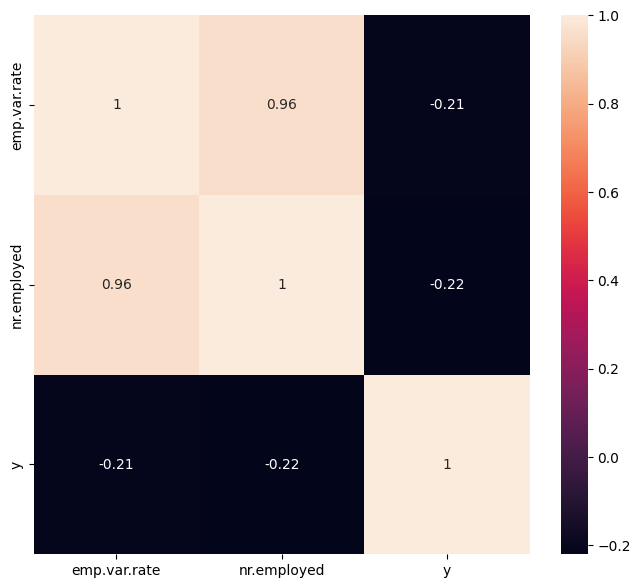

In [12]:
dfx3 = df_x[['emp.var.rate', 'nr.employed']]
dfx3['y'] = df_y 
plt.figure(figsize = (5,4))
sns.heatmap(round(dfx3.corr(),2),annot=True)
plt.show()